<a href="https://colab.research.google.com/github/Repollo1000/ADA-Informes/blob/main/informe_Sub_arreglomaximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descripción del problema**

El problema de subarray máximo es el método para encontrar el subarray contenido dentro de una
matriz unidimensional de números que tiene la suma más grande.

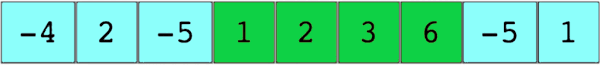

El problema fue propuesto originalmente por Ulf Grenander de la Brown University en 1977, como
un modelo simplificado para la estimación de máxima probabilidad de patrones en imágenes
digitalizadas.

Podemos resolver este problema, consideremos un arreglo con varios elementos, idealmente numeros enteros . Nos debe interesar el sub-arreglo que tiene la mayor suma.

Por ejemplo, si
tenemos la matriz [0, 1, 2, -2, 3, 2] , el subarreglo máximo es [3, 2] , con una suma de 5 .

# **Decripción del algoritmo**
La idea de este algoritmo es encontrar la suma mas grande de contena el arreglo, en este caso vamos a ver como se resuelve con el paradigma divide y venceras.

En nuestro algoritmo se va componer de 3 partes:

1.   Caso base: Es cuando el arreglo tiene solo un elemento
2.   Recursividad: Iremos dividiendo el arreglo
3.   Caso especial: Si el arreglo maximo esta entremedio de 2 mitades

El algoritmo despues de pasar el caso base vamos a dividir el arreglo en sub arreglos de forma recursiva para que cada instancia sea mas peque;a que el arreglo original, tendremos un caso especial para cuando el arreglo maximo esta entremedio de 2 sub-arreglos que se solucionara de una forma lineal.







# **Algoritmo**

In [150]:
import math
import random
import copy
from time import time
from termcolor import colored

def maxSum(arr, mid, l, r,cont, verbose = False):
#    if Verbose: print(a[l:r])
    left_sum = -10000
    r_sum = -10000
    suma = 0 
    ind_izq = mid-1
    ind_der = len(arr)

    # Inicializamos las variables que usaremos para la parte izquierda
    for i in range (mid-1, l-1, -1):
        suma += arr[i]
        if left_sum < suma:
            left_sum = suma;
            ind_izq = i

    # Inicializamos las variables que usaremos para la parte derecha
    suma = 0;
    for i in range (mid, r):
        suma += arr[i]
        if r_sum < suma:
            r_sum = suma
            ind_der = i+1
    # Retornamos la suma de los elemendos de izquierda a derecha del centro
    return left_sum + r_sum, ind_izq, ind_der;   
        

def maxSub(arr , left = -1 ,  right = -1 , verbose = False):
    if left == -1 and right == -1:
      left = 0;
      right = len(arr);

    if ( right-left == 1):
      return arr[right-1], left, right

    if verbose: print(arr[left:right])
    # Encontramos el punto medio del subarreglo
    mid = (left + right) // 2
    if (verbose == True):
      leftArr = arr[ :mid]
      print("Izquierda" ,leftArr)
      rightArr = arr[mid:  ]
      print("Derecha" ,rightArr)
    


    left_sum, izq_izq, izq_der = maxSub(arr, left, mid,verbose );

    r_sum, der_izq, der_der = maxSub(arr, mid , right,verbose);

    suma_total_lr, cruce_izq, cruce_der = maxSum(arr, mid, left, right,verbose);

   
    max_sum = max(suma_total_lr, left_sum, r_sum)

    if max_sum == suma_total_lr:
        return suma_total_lr, cruce_izq, cruce_der;
    elif max_sum == r_sum:
        return r_sum, der_izq, der_der;
    elif max_sum == left_sum:
        return left_sum, izq_izq, izq_der;

# Inicializamos variables
verbose = False
cont = [0,0]

tiempo_in = time()
arr = [-2, -3, 4, -1, 5, 1, 5, -3]
resultado, ind_1, ind_2 = maxSub(arr,verbose = False)

print("Arreglo :",arr )

print("La maxima suma contigua es:",resultado)
print("indices:",ind_1 ,"y", ind_2-1)
print("Sub-array maximo:",arr[ind_1:ind_2])

tiempo_fin = time() - tiempo_in

# Imprimimos el tiempo de ejecucion
print("Tiempo de ejecucion: %.10f segundos." % tiempo_fin)

Arreglo : [-2, -3, 4, -1, 5, 1, 5, -3]
La maxima suma contigua es: 14
indices: 2 y 6
Sub-array maximo: [4, -1, 5, 1, 5]
Tiempo de ejecucion: 0.0043091774 segundos.


## **Verbose**

In [152]:
ind = [0,0]
i=0
arr = [-2, -3, 4, -1, 5, 1, 5, -3]
resultado, ind_1, ind_2 = maxSub(arr, 0, len(arr), verbose = True)


[-2, -3, 4, -1, 5, 1, 5, -3]
Izquierda [-2, -3, 4, -1]
Derecha [5, 1, 5, -3]
[-2, -3, 4, -1]
Izquierda [-2, -3]
Derecha [4, -1, 5, 1, 5, -3]
[-2, -3]
Izquierda [-2]
Derecha [-3, 4, -1, 5, 1, 5, -3]
[4, -1]
Izquierda [-2, -3, 4]
Derecha [-1, 5, 1, 5, -3]
[5, 1, 5, -3]
Izquierda [-2, -3, 4, -1, 5, 1]
Derecha [5, -3]
[5, 1]
Izquierda [-2, -3, 4, -1, 5]
Derecha [1, 5, -3]
[5, -3]
Izquierda [-2, -3, 4, -1, 5, 1, 5]
Derecha [-3]


# **Demuestre que la función MaxSubArrayMid es correcta.**



Invariante de bucle

# **Demuestre que el algortmo MaxSubArray es correcto utilizando inducción.**

# **4.2.Correctitud del algoritmo**


### **(MaxSubArray)**


El algoritmo tiene una complejidad **O(nlog(n)**

Caso base (n = 1):
En esta caso es cuando nuestro arreglo contiene solo un elemento donde ese seria ese elemento la respuesta, porque cameos en el caso base de nuestro algoritmo y el elemento seria retornado.


caso 2 (n > 1):

En este caso el algoritmo se llamará la función **`maxSub`** las veces que sea necesario retornando la suma máxima de los sub-arreglo, luego se llama otra función para calcular el máximo sub-arreglo medio **`maxSum`** asumiendo que esta función es correcta gracias al anterior teorema tendremos una variable suma.

Existen 3 casos para solucionar el este problema.


> El caso 1 y 2 son prácticamente iguales y ocurren cuando el sub arreglo máximo está en la mitad-Derecha o en la mitad-izquierda, para ejemplificar esto de la mejor manera definimos 3 variables **`left_Sum`, `right_Sum`** y **`sum_total`**.



*   Si el sub_arreglo máximo está en el lado izquierdo se debe cumplir que **`left_Sum < sum_total`** en el caso contrario estaría mal y la función no sería correcto, si sabemos que el lado izquierdo tiene la suma máxima se debe cumplir que **`left_Sum = sum_total`** para que sea correcto.

*    Si el sub_arreglo máximo está en el lado derecho se debe cumplir que **`right_Sum < sum_total`** en el caso contrario estaria mal y la función no sería correcto, si sabemos que el lado derecho tiene la suma máxima se debe cumplir que **`right_Sum = sum_total`** para que sea correcto.

> En el tercer caso, es cuando el sub-arreglo máximo pasa por la mitad, es decir **`sum_total == sum_mid`** en el caso que esta condición es distinta estaríamos frente a un algoritmo erróneo y para que eso no ocurra tenemos la función **`MaxSubArrayMid`** que se encarga de solucionar este caso y saber si **`sum_total == sum_mid`** se cumple esta condición para retornar el valor correcto.


# **Analice e indique el tiempo de ejecución del algoritmo. Identifique el peor y mejor caso.**

## **Tiempo de ejecución**

El tiempo de ejecución, se asocia auna determinada entrada que corresponde al número de operaciones ejecutados por el algoritmo.

El algoritmo de sub-arreglo máximo tiene un tiempo de ejecución de O(nlog(n)) en el peor caso.

Para calcular el tiempo de ejecucion de este algoritmo que se basa en un dise;o de divide y venceras,en este caso tenemos que la recurrecncia es igual al merg sort **T(n)=O(nlog(n))** para entender la ecuacion debemos mirar el arbol de recurcion

Debemos recordar que esa ecuacion se obtiene gracias a la altura y la suma de cada nivel que es cn, no esta demas hablar de otros metodos(fuerza bruta y Kadane) para resolver este problema que tienen un tiempo de ejecucion distinto. 

Explicacion breve: tenemos que tener en cuenta 2 cosas que en cada itercion el problema se va a dicidir en dos **(n\2)** y la suma de cada nuvel es igual a n, ahora tenemos que tomar en cuenta que  **T(n)=O(nlog(n))** , que es lo que nos queda si multiplicamos la altura con la cantidad de datos.



### **Comprobación por metodo de sustitución**

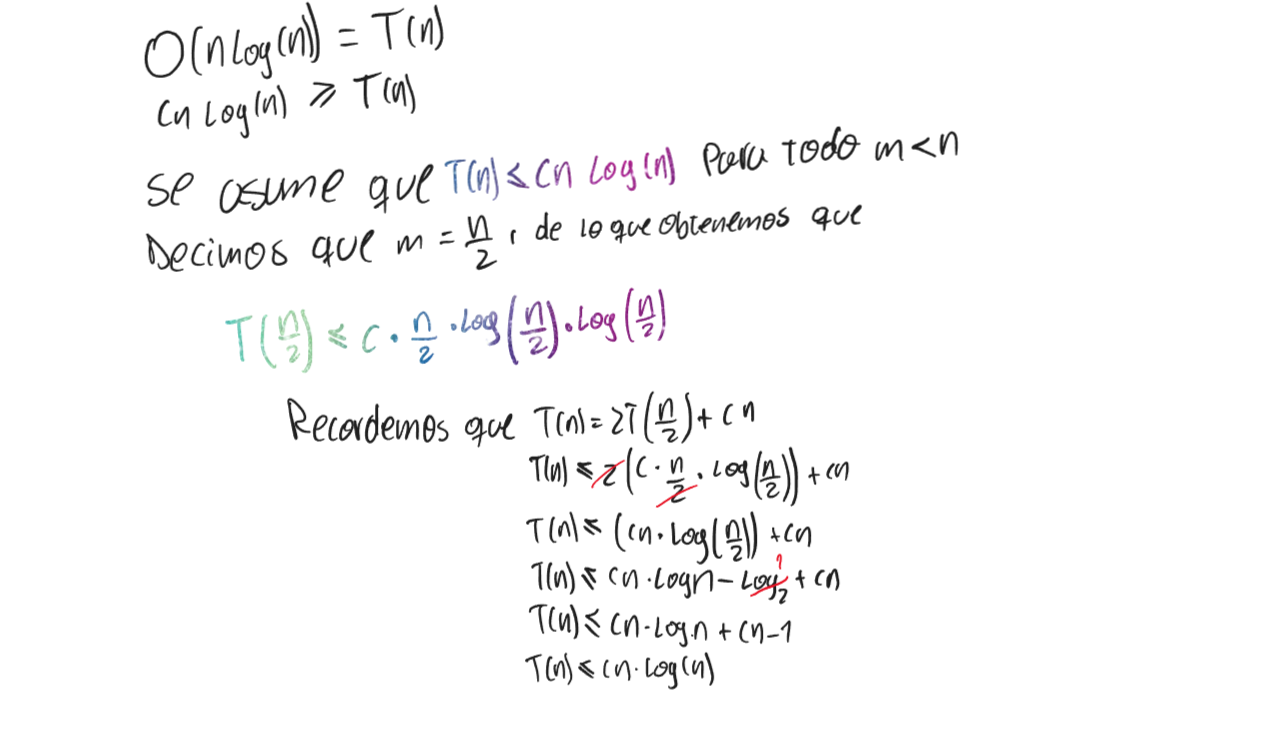

# **5.Experimentos**

In [154]:
def kadane(A):
 
    # encontrar el máximo elemento presente en una lista dada
    maximum = max(A)
 
    # si la lista contiene todos los valores negativos, devolver el elemento máximo
    if maximum < 0:
        return maximum
 
    # almacena la sublista de suma máxima encontrada hasta el momento
    max_so_far = 0
 
    # almacena la suma máxima de la sublista que termina en la posición actual
    max_ending_here = 0
 
    # do para cada elemento de una lista dada
    for i in A:
 
        # actualice la suma máxima de la sublista "finalizando" en el índice `i` (agregando el
        # elemento actual a la suma máxima que termina en el índice anterior `i-1`)
        max_ending_here = max_ending_here + i
 
        # si la suma máxima es negativa, configúrelo en 0 (lo que representa
        # una sublista vacía)
        max_ending_here = max(max_ending_here, 0)
 
        # actualiza el resultado si se encuentra que la suma de la sublista actual es mayor
        max_so_far = max(max_so_far, max_ending_here)
 
    return max_so_far
A = [-8, -3, -6, -2, -5, -4]
print("The sum of contiguous sublist with the largest sum is", kadane(A))

The sum of contiguous sublist with the largest sum is -2


In [158]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
from termcolor import colored
import copy


x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import maxSub", stmt=f"maxSub({a},{0},{n-1},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["kadane Sort", "maxSub"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

TypeError: ignored